## __Data Selection__
You need to get the data that you will use for the index. This could be done by using<br>
publicly available data sets or survey.<br>
(10 Marks)

In [429]:
import pandas as pd

file_path = 'Sleep_health_and_lifestyle_dataset.csv'
data = pd.read_csv(file_path)
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [430]:
# Drop Person ID column
data.drop('Person ID', axis=1, inplace=True)
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [431]:
# Drop Blood Pressure column
data.drop('Blood Pressure', axis=1, inplace=True)
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea


In [432]:
# Print column names
data.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Sleep Disorder'],
      dtype='object')

In [433]:
# Print shape of data
data.shape

(374, 11)

In [434]:
# Describe the data
data.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


## __Imputation of Missing Data__
If your data is not complete you will need to infer values to complete the dataset.<br>
(10 Marks)

In [435]:
# Check for missing values
missing_data = data.isnull().sum()
missing_data

Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [436]:
# Impute missing values with 'None' for people with no sleep disorder
data.fillna({'Sleep Disorder': 'None'}, inplace=True)
print(data.isnull().sum())

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


In [437]:
# Print unique values in Sleep Disorder column
data['Sleep Disorder'].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

__One Hot Encode__

In [438]:
# Identify Categorical columns
categorical_columns = data.select_dtypes(include='object').columns
categorical_columns

Index(['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder'], dtype='object')

In [439]:
# Add categorical columns to a list
categorical_columns = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

In [440]:
# Initialise OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')

In [441]:
# Fit and transform the data
encoded_data = encoder.fit_transform(data[categorical_columns])

In [442]:
# Convert the encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

In [443]:
# Reset the index of the original data
data.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

In [444]:
# Drop the original categorical columns from the original data
data.drop(categorical_columns, axis=1, inplace=True)

In [445]:
# Concatenate the original data with the encoded data
final_data = pd.concat([data, encoded_df], axis=1)

In [446]:
# Print the final data
final_data.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Gender_Male,Occupation_Doctor,Occupation_Engineer,...,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder_None,Sleep Disorder_Sleep Apnea
0,27,6.1,6,42,6,77,4200,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,28,6.2,6,60,8,75,10000,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,28,6.2,6,60,8,75,10000,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,28,5.9,4,30,8,85,3000,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,28,5.9,4,30,8,85,3000,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## __Multivariate Analysis__
Analyse and report on the structure of the data. Decide what are the most important<br>
variables and what should be excluded from the index.<br>
(10 Marks)


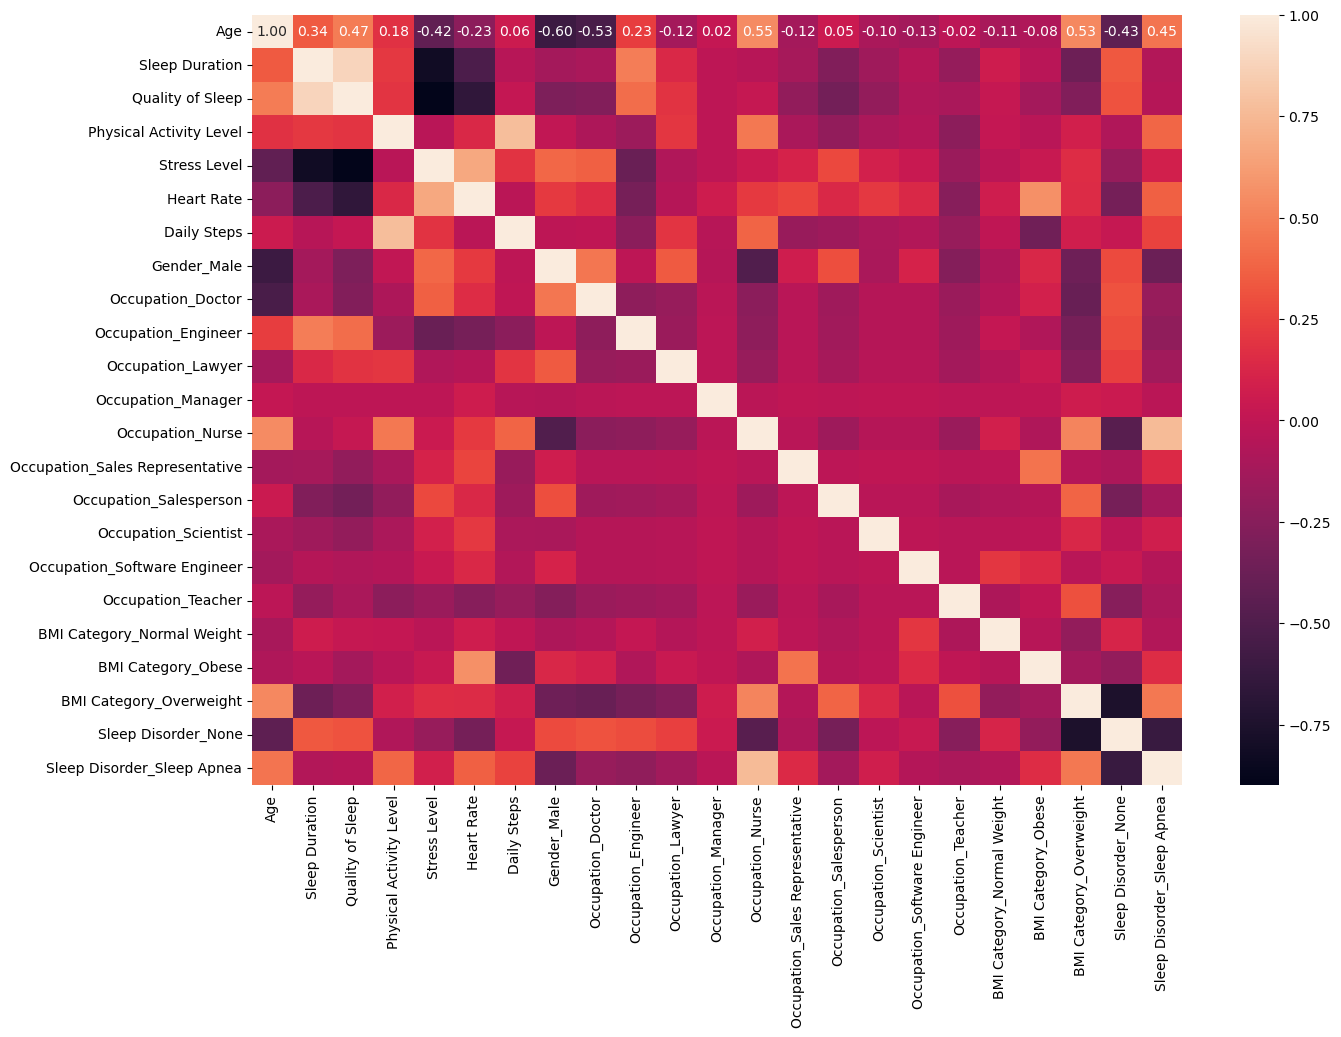

In [447]:
# Correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = final_data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.show()


#### __Linear Scatter Plots__<br>
Dependent variable "Quality of Sleep" vs Independent variables

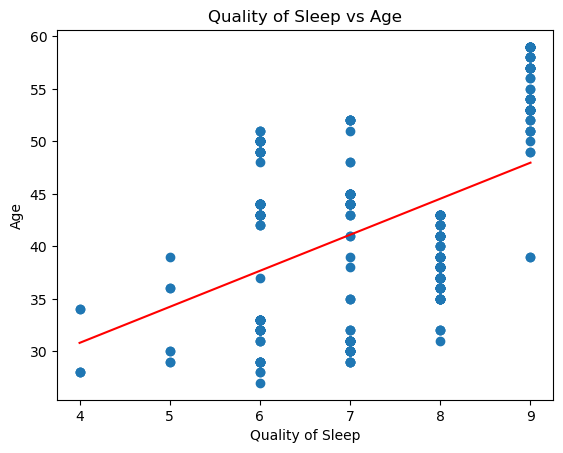

In [448]:
import numpy as np

# Linear Scatter plot Quality of Sleep vs Age
plt.title("Quality of Sleep vs Age")
plt.xlabel("Quality of Sleep")
plt.ylabel("Age")
plt.scatter(final_data['Quality of Sleep'], final_data['Age'])
plt.plot(np.unique(final_data['Quality of Sleep']), np.poly1d(np.polyfit(final_data['Quality of Sleep'], final_data['Age'], 1))(np.unique(final_data['Quality of Sleep'])), color='red')

__Slight correlation between Quality of Sleep and Age. Suggesting that as age increases the Quality of Sleep might as well.__

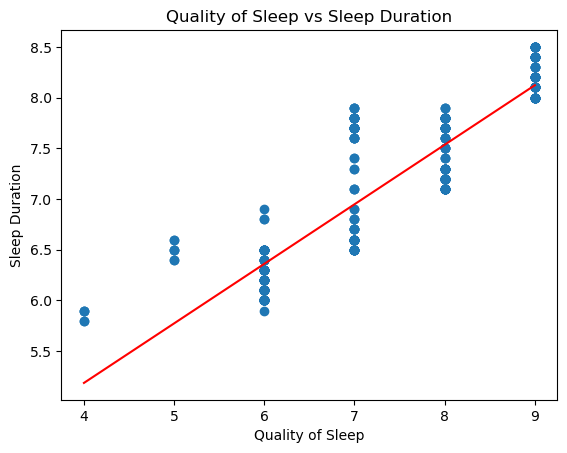

In [449]:
# Linear Scatter plot Quality of Sleep vs Sleep Duration
plt.title("Quality of Sleep vs Sleep Duration")
plt.xlabel("Quality of Sleep")
plt.ylabel("Sleep Duration")
plt.scatter(final_data['Quality of Sleep'], final_data['Sleep Duration'])
plt.plot(np.unique(final_data['Quality of Sleep']), np.poly1d(np.polyfit(final_data['Quality of Sleep'], final_data['Sleep Duration'], 1))(np.unique(final_data['Quality of Sleep'])), color='red')

__High correlation between Quality of Sleep and Sleep Duration. As Sleep Duration increases so does Quality of Sleep.__

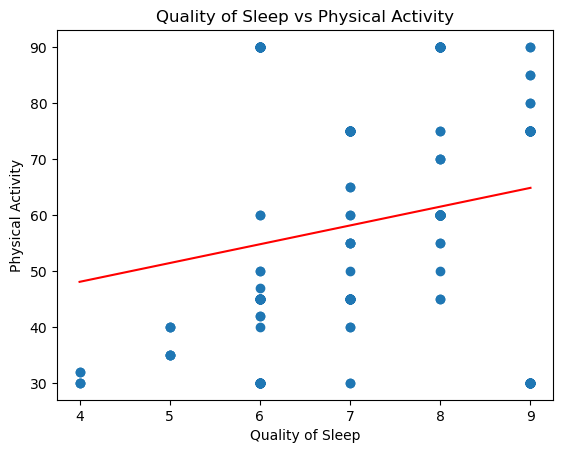

In [450]:
# Linear Scatter plot Quality of Sleep vs Physical Activity
plt.title("Quality of Sleep vs Physical Activity")
plt.xlabel("Quality of Sleep")
plt.ylabel("Physical Activity")
plt.scatter(final_data['Quality of Sleep'], final_data['Physical Activity Level'])
plt.plot(np.unique(final_data['Quality of Sleep']), np.poly1d(np.polyfit(final_data['Quality of Sleep'], final_data['Physical Activity Level'], 1))(np.unique(final_data['Quality of Sleep'])), color='red')

__Slight correlation between Quality of Sleep and Physical Activity Level. With more Physical Activity it may increase Sleep Quality__

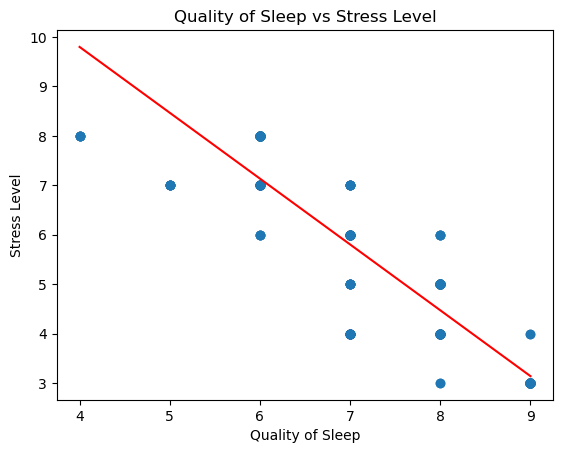

In [451]:
# Linear Scatter plot Quality of Sleep vs Stress Level
plt.title("Quality of Sleep vs Stress Level")
plt.xlabel("Quality of Sleep")
plt.ylabel("Stress Level")
plt.scatter(final_data['Quality of Sleep'], final_data['Stress Level'])
plt.plot(np.unique(final_data['Quality of Sleep']), np.poly1d(np.polyfit(final_data['Quality of Sleep'], final_data['Stress Level'], 1))(np.unique(final_data['Quality of Sleep'])), color='red')

__Negative correlation between Quality of Sleep and Stress Level. This suggests that as Stress Levels decrease the Quality of Sleep increases__

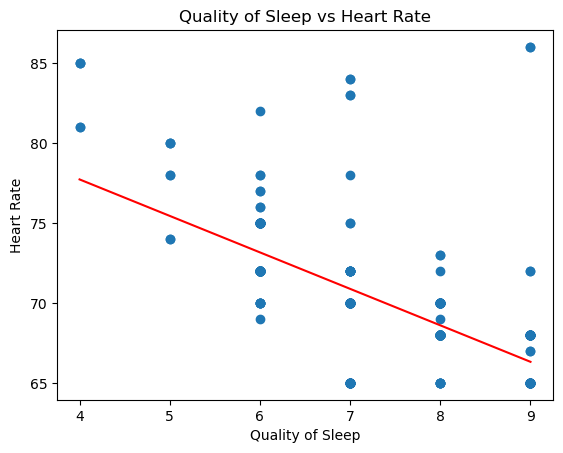

In [452]:
# Linear Scatter plot Quality of Sleep vs Heart Rate
plt.title("Quality of Sleep vs Heart Rate")
plt.xlabel("Quality of Sleep")
plt.ylabel("Heart Rate")
plt.scatter(final_data['Quality of Sleep'], final_data['Heart Rate'])
plt.plot(np.unique(final_data['Quality of Sleep']), np.poly1d(np.polyfit(final_data['Quality of Sleep'], final_data['Heart Rate'], 1))(np.unique(final_data['Quality of Sleep'])), color='red')

__Negative correlation between Quality of Sleep and Heart Rate. This suggests that as Heart Rate decreases the Quality of Sleep increases__

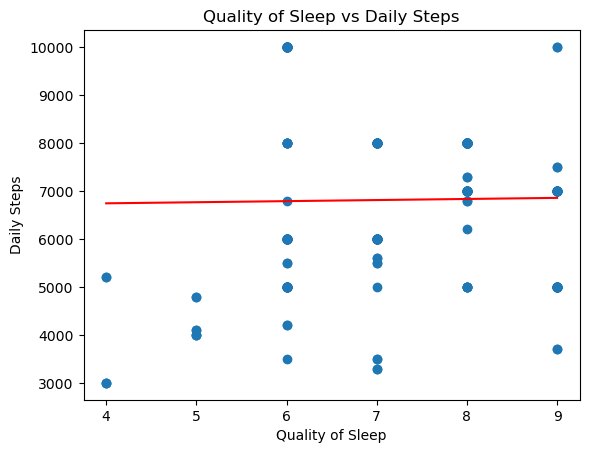

In [453]:
# Linear Scatter plot Quality of Sleep vs Daily Steps
plt.title("Quality of Sleep vs Daily Steps")
plt.xlabel("Quality of Sleep")
plt.ylabel("Daily Steps")
plt.scatter(final_data['Quality of Sleep'], final_data['Daily Steps'])
plt.plot(np.unique(final_data['Quality of Sleep']), np.poly1d(np.polyfit(final_data['Quality of Sleep'], final_data['Daily Steps'], 1))(np.unique(final_data['Quality of Sleep'])), color='red')

__No correlation between Quality of Sleep and Daily Steps.__

#### __Pearson Correlation__

* 1 indicates a perfect positive linear relationship,
* -1 indicates a perfect negative linear relationship,
* 0 indicates no linear relationship.

In [454]:
from scipy.stats import pearsonr

In [455]:
corr = pearsonr(final_data['Quality of Sleep'], final_data['Age'])
print(corr)

PearsonRResult(statistic=0.47373387616198803, pvalue=2.553119182303198e-22)


__Small Correlation__<br>
Age = 0.47

In [456]:
corr = pearsonr(final_data['Quality of Sleep'], final_data['Sleep Duration'])
print(corr)

PearsonRResult(statistic=0.8832130004106167, pvalue=2.170991770869847e-124)


__Very Strong Positive Correlation__<br>
Sleep Duration = 0.88

In [457]:
corr = pearsonr(final_data['Quality of Sleep'], final_data['Physical Activity Level'])
print(corr)

PearsonRResult(statistic=0.19289645493975288, pvalue=0.00017454895247839258)


__Weak Positive Correlation__<br>
Physical Activity Level = 0.19

In [458]:
corr = pearsonr(final_data['Quality of Sleep'], final_data['Stress Level'])
print(corr)

PearsonRResult(statistic=-0.898752031004042, pvalue=2.88012424094114e-135)


__Strong Negative Correlation__<br>
Stress Level = -0.89

In [459]:
corr = pearsonr(final_data['Quality of Sleep'], final_data['Heart Rate'])
print(corr)

PearsonRResult(statistic=-0.6598647331480074, pvalue=4.131998623368065e-48)


__Strong Negative Correlation__<br>
Heart Rate = 0.66

In [460]:
corr = pearsonr(final_data['Quality of Sleep'], final_data['Daily Steps'])
print(corr)

PearsonRResult(statistic=0.01679141492471662, pvalue=0.7461906652961153)


__No Correlation__<br>
Daily Steps = 0.02